# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
# Libraries

import pandas as pd
import numpy as np
from scipy import stats

# Show all columns in pandas
pd.set_option('display.max_columns', None)

# Remove warnings (not necessary)
import warnings
warnings.filterwarnings('ignore')

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
#%matplotlib inline 

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [2]:
# your code here

import pandas as pd
import random

def dice_simulator(number):
    number_rolls = [random.randint(1, 6) for i in range(number)]
    
    dice_df = pd.DataFrame({'Rolls': number_rolls})
    
    return dice_df

dice_rolls_df = dice_simulator(10)

dice_rolls_df

,Rolls
0,2
1,3
2,2
3,4
4,6
5,1
6,4
7,2
8,3
9,6


#### 2.- Plot the results sorted by value.

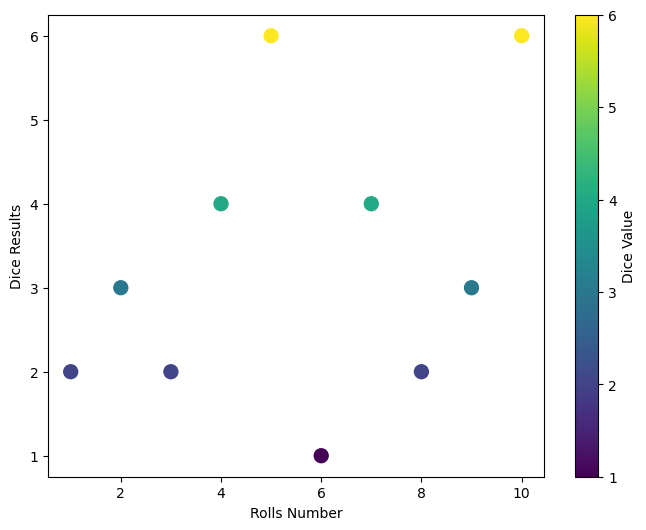

In [40]:
# your code here

sorted_dice_df = dice_rolls_df.sort_values(by='Rolls')

plt.figure(figsize=(8, 6))
plt.scatter(range(1, 11), dice_rolls_df['Rolls'], c=dice_rolls_df['Rolls'], cmap='viridis', s=100)
plt.xlabel('Rolls Number')
plt.ylabel('Dice Results')
plt.colorbar(label='Dice Value')
plt.show()

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

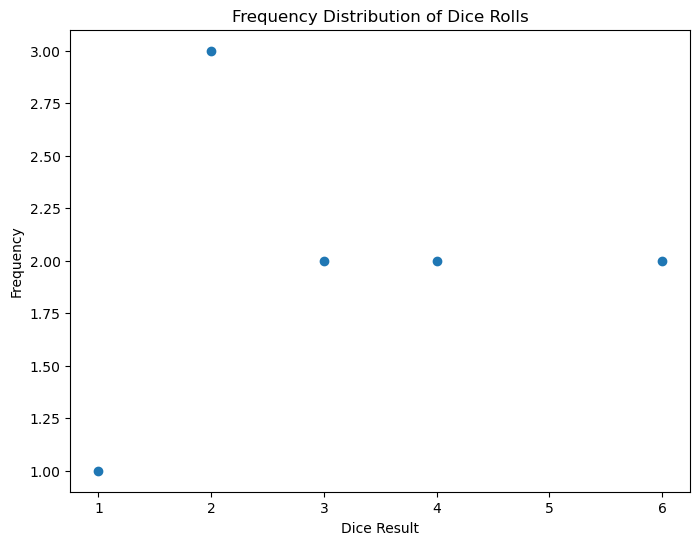

In [41]:
# your code here

freq_dist = dice_rolls_df['Rolls'].value_counts().sort_index()


plt.figure(figsize=(8, 6))
plt.scatter(freq_dist.index, freq_dist.values)
plt.xlabel('Dice Result')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Dice Rolls')
plt.show()



In [5]:
"""
your comments here:

the first plot gives us the result of the relation between the column dice rolls and the dice result. 
it can be any kind of data and relation. The secound plt shows how many times a specific result of the relation happens.

"""



'\nyour comments here:\n\nthe first plot gives us the result of the relation between the column dice rolls and the dice result. \nit can be any kind of data and relation. The secound plt shows how many times a specific result of the relation happens.\n\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [6]:
# your code here

dice_rolls_df_mean = dice_rolls_df["Rolls"].sum() / len(dice_rolls_df["Rolls"])
dice_rolls_df_mean

3.3

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [7]:
# your code here

freq_dist_2 = dice_rolls_df['Rolls'].value_counts().to_dict()
freq_dist_2

{2: 3, 3: 2, 4: 2, 6: 2, 1: 1}

In [8]:
total = 0

for i in freq_dist_2:
    total = i + total
    
total

16

In [9]:
freq_dist_3 = dice_rolls_df['Rolls'].value_counts()

In [10]:
freq_dist_3.sum()

10

In [11]:
mean_dice_3 = total / freq_dist_3.sum()

mean_dice_3

#i think its wrong

1.6

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [12]:
# your code here

import pandas as pd
import random

def dice_simulator_2(number):
    number_rolls = [random.randint(1, 6) for i in range(number)]
    
    dice_2_df = pd.DataFrame({'Rolls': number_rolls})
    
    return dice_2_df

dice_rolls_2_df = dice_simulator_2(10)



In [13]:
def calc_median(df):
    rolls = dice_rolls_2_df["Rolls"].to_list()
    
    sorted_rolls = sorted(rolls)
    
    middle_point = len(sorted_rolls) // 2
    
    if len(sorted_rolls) % 2 == 0:
        median = (sorted_rolls[middle_point - 1] + sorted_rolls[middle_point]) / 2
    else: 
        median = sorted_rolls[middle_point]
        
    return median
    
median = calc_median(dice_rolls_df)

median

3.5

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [54]:
df_dice_rolls = pd.DataFrame(dice_rolls_df)
df_dice_rolls.columns = list()
df_dice_rolls.index = list(range(1, 10))

#i was hopping to creat a new data set with columns for number of roll, 1 to 9 
# and the index the value to avoyde the output ('Rolls', 'Rolls', 'Rolls')


ValueError: Length mismatch: Expected axis has 1 elements, new values have 0 elements

In [46]:
# your code here

def quarts_calc(df):
    sorted_df = sorted(df)
    median_2 = sorted_df[len(sorted_df) // 2]
    
    first_quartile = sorted_df[len(sorted_df) // 4]
    
    third_quartile = sorted_df[len(sorted_df) * 3 // 4]
    
    return first_quartile, median_2, third_quartile
    
quarts = quarts_calc(dice_rolls_df)
quarts


('Rolls', 'Rolls', 'Rolls')

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

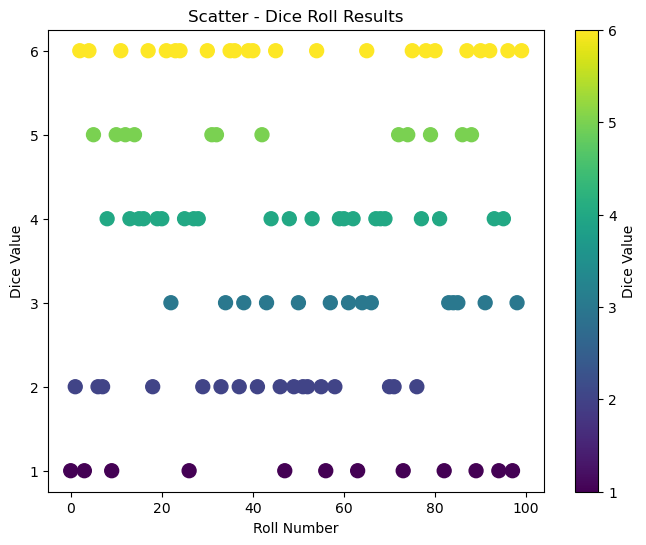

In [15]:
# your code here

hundred_roll_df = pd.read_csv("roll_the_dice_hundred.csv")


plt.figure(figsize=(8, 6))
plt.scatter(hundred_roll_df['roll'], hundred_roll_df['value'], c=hundred_roll_df['value'], cmap='viridis', s=100)
plt.xlabel('Roll Number')
plt.ylabel('Dice Value')
plt.title('Scatter - Dice Roll Results')
plt.colorbar(label='Dice Value')
plt.show()




In [16]:
"""
your comments here:

The more dice rolls we get, the more evenly disperse out values get, 
meaning that if we rolls the dice to the infinite, every dice value would get the same number of results.

"""

'\nyour comments here:\n\nThe more dice rolls we get, the more evenly disperse out values get, \nmeaning that if we rolls the dice to the infinite, every dice value would get the same number of results.\n\n'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [17]:
# your code here

median_100 = calc_median(hundred_roll_df)

median_100


3.5

#### 3.- Now, calculate the frequency distribution.


In [18]:
# your code here

freq_dist_100 = hundred_roll_df['value'].value_counts().sort_index()
freq_dist_100

1    12
2    17
3    14
4    22
5    12
6    23
Name: value, dtype: int64

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

In [61]:
hundred_roll_df.mean()

Unnamed: 0    49.50
roll          49.50
value          3.74
dtype: float64

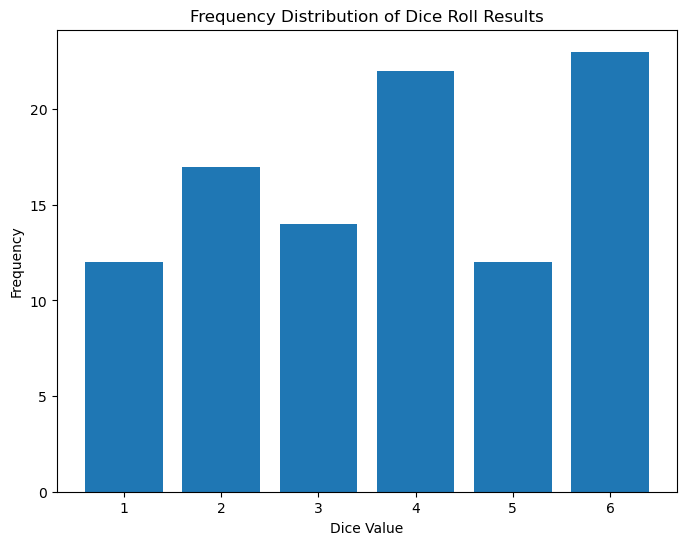

In [19]:
# your code here

plt.figure(figsize=(8, 6))
plt.bar(freq_dist_100.index, freq_dist_100.values)
plt.xlabel('Dice Value')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Dice Roll Results')
plt.xticks(freq_dist_100.index)
plt.show()




In [21]:
"""
your comments here
the mean is 3,74, meaning that we have a higher frequency in higher values.
looking at the plot, we can see the 4 and 6 "push" the median 3,5 closer to this levels. 
if the distribution was even, mean closer to median.

"""

'\nyour comments here\n'

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [58]:
# your code here

thousand_roll_df = pd.read_csv("roll_the_dice_thousand.csv")

freq_dist_1000 = thousand_roll_df['value'].value_counts().sort_index()
freq_dist_1000

1    175
2    167
3    175
4    168
5    149
6    166
Name: value, dtype: int64

In [23]:
"""
your comments here

the numbers from 1 to 6 are getting more and more even in terms of freq.

"""

'\nyour comments here\n'

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [64]:
age_pop_df = pd.read_csv("ages_population.csv")
age_pop_df

,observation
0,68.0
1,12.0
2,45.0
3,38.0
4,49.0
...,...
995,27.0
996,47.0
997,53.0
998,33.0


In [68]:
freq_age_pop = age_pop_df['observation'].value_counts().sort_index()
freq_age_pop.sample(40)

37.0    30
15.0     8
68.0     3
51.0     9
82.0     1
8.0      5
41.0    36
32.0    30
56.0    15
16.0     8
34.0    29
43.0    32
4.0      1
39.0    45
53.0    12
7.0      1
14.0    10
38.0    30
36.0    31
13.0     6
59.0     8
48.0    19
17.0    10
24.0    18
69.0     1
21.0    14
62.0     4
12.0    11
45.0    29
19.0    11
9.0      2
33.0    22
73.0     1
31.0    24
10.0     3
25.0    19
11.0     3
26.0    23
47.0    17
23.0    17
Name: observation, dtype: int64

In [74]:
freq_age_pop

1.0     2
2.0     2
4.0     1
5.0     2
6.0     2
       ..
69.0    1
70.0    1
71.0    1
73.0    1
82.0    1
Name: observation, Length: 72, dtype: int64

In [70]:
# your code here

"""
your comments here

as we have higher values for freq arround the 30's and 40's, i would say the mean would be 
in that range. we dont have many outliners

We have alot more accorrencies in that range so standard deveation will not be higher.


"""


"\nyour comments here\n\nas we have higher values for freq arround the 30's and 40's, i would say the mean would be \nin that range. we dont have many outliners\n\nWe have alot more accorrencies in that range so standard deveation will not be higher.\n\n\n"

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [72]:
# your code here

age_pop_df.mean()

observation    36.56
dtype: float64

In [73]:
age_pop_df.std()

observation    12.8165
dtype: float64

In [26]:
"""
your comments here

my guess was correct. if we have a lot of outlier, like an aged population or a bigger number
of births , the standard dev would be higher

"""

'\nyour comments here\n'

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [75]:
# your code here

age_pop_2_df = pd.read_csv("ages_population2.csv")
age_pop_2_df


,observation
0,25.0
1,31.0
2,29.0
3,31.0
4,29.0
...,...
995,26.0
996,22.0
997,21.0
998,19.0


In [83]:
freq_age_2_pop = age_pop_2_df['observation'].value_counts().sort_index()
freq_age_2_pop

19.0      3
20.0     13
21.0     17
22.0     35
23.0     41
24.0     78
25.0     98
26.0    120
27.0    125
28.0    139
29.0    115
30.0     90
31.0     61
32.0     31
33.0     22
34.0      7
35.0      3
36.0      2
Name: observation, dtype: int64

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [28]:
"""
your comments here

our population is concetrated arround 28 years old

"""

'\nyour comments here\n'

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [80]:
# your code here
age_pop_2_df.mean()



observation    27.155
dtype: float64

In [81]:
age_pop_2_df.std()

observation    2.969814
dtype: float64

In [30]:
"""
your comments here

our mean value is now 27 and the std is now 2,97.
this means that the min and max values are mutch closer to the mean then the previous age pop.

"""

'\nyour comments here\n'

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [82]:
# your code here

age_pop_3_df = pd.read_csv("ages_population3.csv")
age_pop_3_df


,observation
0,21.0
1,21.0
2,24.0
3,31.0
4,54.0
...,...
995,16.0
996,55.0
997,30.0
998,35.0


In [103]:
freq_age_3_pop = age_pop_3_df['observation'].value_counts().sort_index()
freq_age_3_pop
pd.DataFrame(freq_age_3_pop)

,observation
1.0,1
2.0,2
4.0,2
5.0,1
7.0,1
...,...
73.0,6
74.0,6
75.0,2
76.0,1


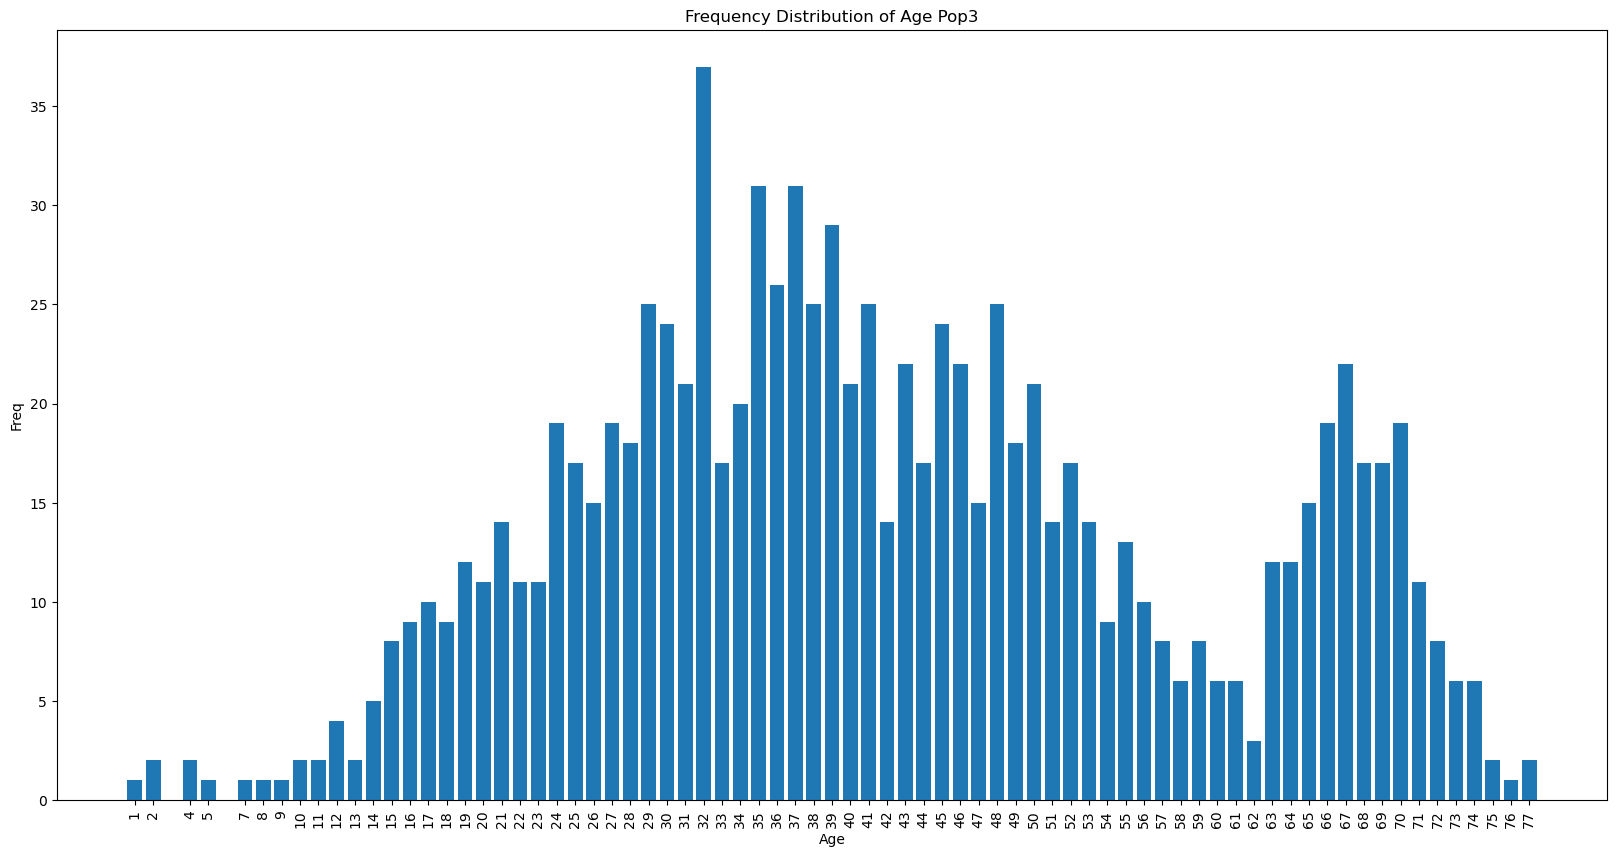

In [106]:
plt.figure(figsize=(20, 10))
plt.bar(freq_age_3_pop.index, freq_age_3_pop.values)
plt.xlabel('Age')
plt.ylabel('Freq')
plt.title('Frequency Distribution of Age Pop3')
plt.xticks(freq_age_3_pop.index)
plt.xticks(rotation=90)
plt.show()

I think this is not the correct plot for the std.
from this, we could assume the mean would be arround 40-43.

In [96]:
pd.DataFrame(freq_age_3_pop)

,observation
1.0,1
2.0,2
4.0,2
5.0,1
7.0,1
...,...
73.0,6
74.0,6
75.0,2
76.0,1


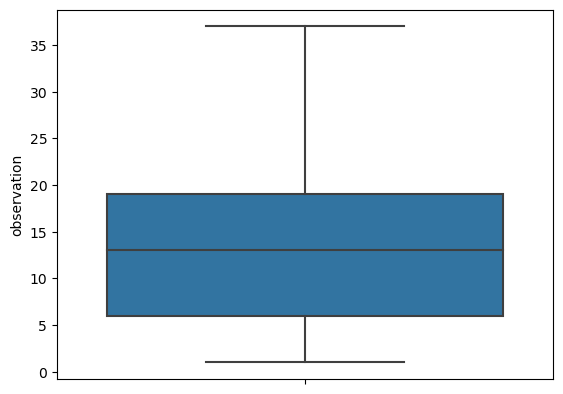

In [99]:
sns.boxplot(y=freq_age_3_pop)
plt.show()

In [107]:
freq_age_3_pop.head(40)

1.0      1
2.0      2
4.0      2
5.0      1
7.0      1
8.0      1
9.0      1
10.0     2
11.0     2
12.0     4
13.0     2
14.0     5
15.0     8
16.0     9
17.0    10
18.0     9
19.0    12
20.0    11
21.0    14
22.0    11
23.0    11
24.0    19
25.0    17
26.0    15
27.0    19
28.0    18
29.0    25
30.0    24
31.0    21
32.0    37
33.0    17
34.0    20
35.0    31
36.0    26
37.0    31
38.0    25
39.0    29
40.0    21
41.0    25
42.0    14
Name: observation, dtype: int64

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [32]:
# your code here

In [92]:
freq_age_3_pop.mean()

13.333333333333334

In [86]:
freq_age_3_pop.std()

8.726061204469291

In [33]:
"""
your comments here

like we can see on the plot, our mean is between 10 and 15, so 13.

we have outliner but the majority of our data is in arround the mean, so std in low.

we have outliner at higher ages.

"""

'\nyour comments here\n'

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [109]:
# your code here

freq_age_3_pop.quantile([0.25, 0.5, 0.75])


0.25     6.0
0.50    13.0
0.75    19.0
Name: observation, dtype: float64

In [35]:
"""
your comments here


the 0.5 quartile should be close to our mean, so its correct.

the mean and the median are close to eatch other, meaning that the data is evenly 
distributed around the center of the distribution. There are not many extreme vslues.

"""

'\nyour comments here\n'

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [114]:
# your code here

freq_age_3_pop.quantile([0.1, 0.2, 0.8, 0.9])


0.1     2.0
0.2     4.8
0.8    21.0
0.9    25.0
Name: observation, dtype: float64

In [37]:
"""
your comments here

our outliner are at the top 20%

"""

'\nyour comments here\n'

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [38]:
# your code here

In [39]:
"""
your comments here
"""

'\nyour comments here\n'